In [ ]:
#bilinear

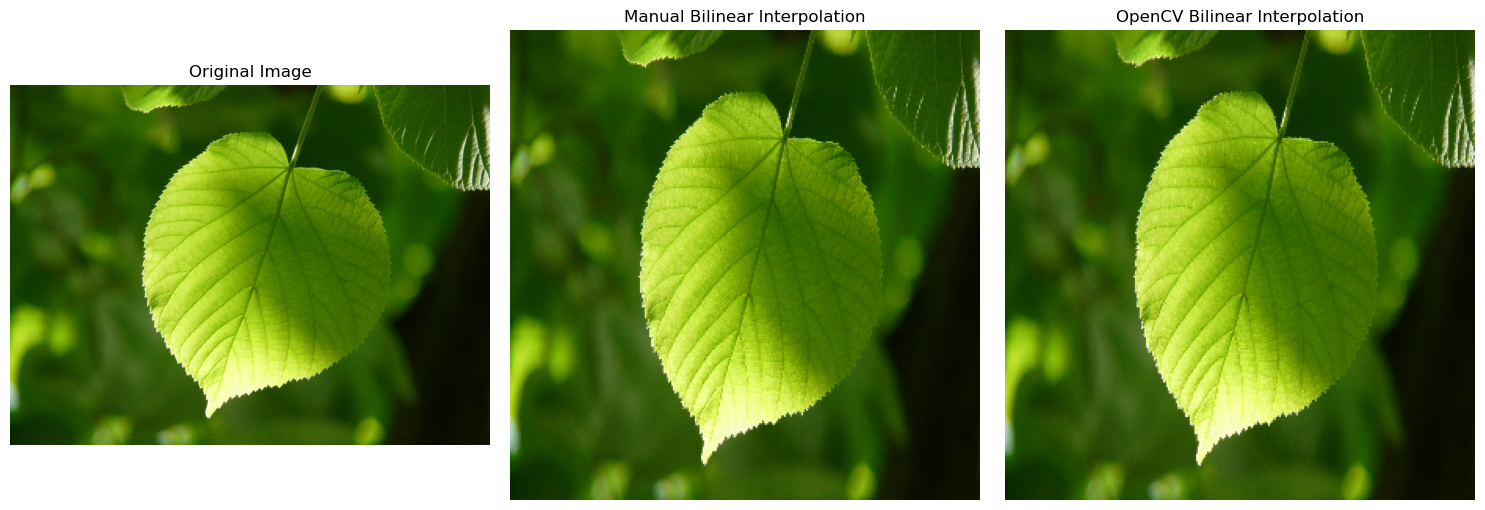

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load original RGB image
img_path = r"C:\Users\onlyh\Downloads\leaf1.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

# Resize target dimensions
new_height, new_width = 300, 300

def bilinear_interpolation_rgb(image, new_height, new_width):
    height, width, channels = image.shape
    resized = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    x_ratio = float(width - 1) / (new_width - 1)
    y_ratio = float(height - 1) / (new_height - 1)

    for i in range(new_height):
        for j in range(new_width):
            x_l = int(np.floor(x_ratio * j))
            y_t = int(np.floor(y_ratio * i))
            x_h = min(x_l + 1, width - 1)
            y_b = min(y_t + 1, height - 1)

            x_weight = (x_ratio * j) - x_l
            y_weight = (y_ratio * i) - y_t

            for c in range(channels):
                a = image[y_t, x_l, c]
                b = image[y_t, x_h, c]
                c_ = image[y_b, x_l, c]
                d = image[y_b, x_h, c]

                pixel = (a * (1 - x_weight) * (1 - y_weight) +
                         b * x_weight * (1 - y_weight) +
                         c_ * (1 - x_weight) * y_weight +
                         d * x_weight * y_weight)

                resized[i, j, c] = int(pixel)
    return resized

# Apply manual interpolation
manual_resized = bilinear_interpolation_rgb(img, new_height, new_width)

# Apply OpenCV interpolation
opencv_resized = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

# Show results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(manual_resized)
plt.title("Manual Bilinear Interpolation")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(opencv_resized)
plt.title("OpenCV Bilinear Interpolation")
plt.axis('off')

plt.tight_layout()
plt.show()


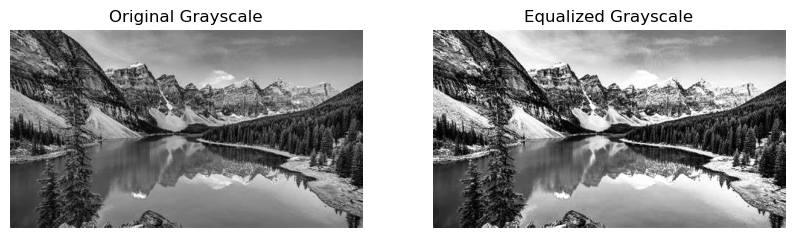

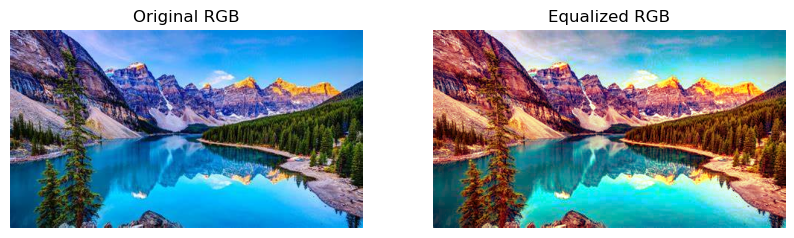

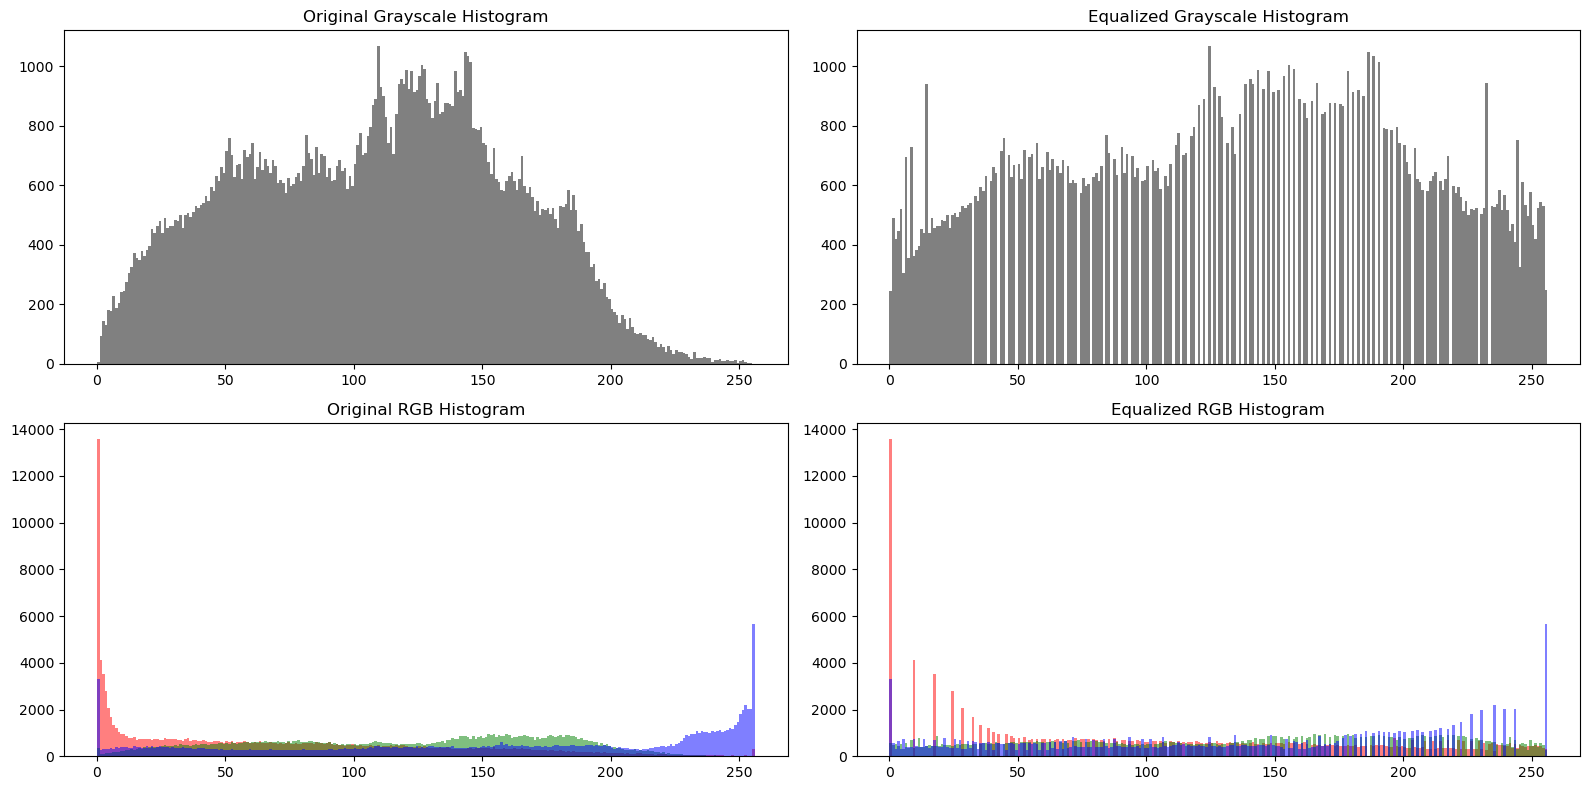

=== Grayscale Metrics ===
Contrast Improvement Index (CII): 1.4254
Entropy: 7.5300
Tenengrad (Laplacian Variance): 5999.3809
Histogram Spread / Std Dev: 73.6500
AMBE: 20.2203

=== RGB Metrics (Mean over channels) ===
Contrast Improvement Index (CII): 1.1580
Entropy: 7.3342
Tenengrad (Laplacian Variance): 4020.3862
Histogram Spread / Std Dev: 76.5444
AMBE: 28.8704


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import shannon_entropy

# === Load and Convert Image ===
def load_image(path):
    img = cv2.imread(path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img_rgb, img_gray

# === Histogram Equalization ===
def enhance_image(img_rgb, img_gray):
    # Grayscale equalization
    enhanced_gray = cv2.equalizeHist(img_gray)

    # Equalize each RGB channel separately
    r, g, b = cv2.split(img_rgb)
    eq_r = cv2.equalizeHist(r)
    eq_g = cv2.equalizeHist(g)
    eq_b = cv2.equalizeHist(b)
    enhanced_rgb = cv2.merge((eq_r, eq_g, eq_b))

    return enhanced_rgb, enhanced_gray

# === Plot Histogram Before and After Equalization ===
def plot_histograms(original_gray, enhanced_gray, original_rgb, enhanced_rgb):
    plt.figure(figsize=(16, 8))

    # Grayscale Histogram
    plt.subplot(2, 2, 1)
    plt.hist(original_gray.ravel(), 256, [0, 256], color='gray')
    plt.title('Original Grayscale Histogram')

    plt.subplot(2, 2, 2)
    plt.hist(enhanced_gray.ravel(), 256, [0, 256], color='gray')
    plt.title('Equalized Grayscale Histogram')

    # RGB Histograms (Before Equalization)
    colors = ['r', 'g', 'b']
    plt.subplot(2, 2, 3)
    for i, color in enumerate(colors):
        plt.hist(original_rgb[:, :, i].ravel(), 256, [0, 256], color=color, alpha=0.5)
    plt.title('Original RGB Histogram')

    # RGB Histograms (After Equalization)
    plt.subplot(2, 2, 4)
    for i, color in enumerate(colors):
        plt.hist(enhanced_rgb[:, :, i].ravel(), 256, [0, 256], color=color, alpha=0.5)
    plt.title('Equalized RGB Histogram')

    plt.tight_layout()
    plt.show()

# === Enhancement Metrics ===
def contrast_improvement_index(original, enhanced):
    def rms_contrast(img):
        return np.std(img)
    return rms_contrast(enhanced) / (rms_contrast(original) + 1e-5)

def compute_entropy(img):
    return shannon_entropy(img)

def compute_tenengrad(img):
    lap = cv2.Laplacian(img, cv2.CV_64F)
    return lap.var()

def compute_std(img):
    return np.std(img)

def compute_ambe(original, enhanced):
    return abs(np.mean(original) - np.mean(enhanced))

# === Display Images ===
def display_images(original, enhanced, title1="Original", title2="Enhanced"):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray' if len(original.shape) == 2 else None)
    plt.title(title1)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(enhanced, cmap='gray' if len(enhanced.shape) == 2 else None)
    plt.title(title2)
    plt.axis('off')
    plt.show()

# === Evaluate Metrics ===
def evaluate_metrics(original_rgb, original_gray, enhanced_rgb, enhanced_gray):
    print("=== Grayscale Metrics ===")
    print(f"Contrast Improvement Index (CII): {contrast_improvement_index(original_gray, enhanced_gray):.4f}")
    print(f"Entropy: {compute_entropy(enhanced_gray):.4f}")
    print(f"Tenengrad (Laplacian Variance): {compute_tenengrad(enhanced_gray):.4f}")
    print(f"Histogram Spread / Std Dev: {compute_std(enhanced_gray):.4f}")
    print(f"AMBE: {compute_ambe(original_gray, enhanced_gray):.4f}")
    
    print("\n=== RGB Metrics (Mean over channels) ===")
    cii_rgb = np.mean([contrast_improvement_index(original_rgb[..., i], enhanced_rgb[..., i]) for i in range(3)])
    entropy_rgb = np.mean([compute_entropy(enhanced_rgb[..., i]) for i in range(3)])
    tenengrad_rgb = np.mean([compute_tenengrad(enhanced_rgb[..., i]) for i in range(3)])
    std_rgb = np.mean([compute_std(enhanced_rgb[..., i]) for i in range(3)])
    ambe_rgb = np.mean([compute_ambe(original_rgb[..., i], enhanced_rgb[..., i]) for i in range(3)])
    
    print(f"Contrast Improvement Index (CII): {cii_rgb:.4f}")
    print(f"Entropy: {entropy_rgb:.4f}")
    print(f"Tenengrad (Laplacian Variance): {tenengrad_rgb:.4f}")
    print(f"Histogram Spread / Std Dev: {std_rgb:.4f}")
    print(f"AMBE: {ambe_rgb:.4f}")

# === MAIN ===
image_path = r"C:\Users\onlyh\Downloads\nature1.jpeg"  # Your image path

# Load and Enhance
original_rgb, original_gray = load_image(image_path)
enhanced_rgb, enhanced_gray = enhance_image(original_rgb, original_gray)

# Display Results
display_images(original_gray, enhanced_gray, "Original Grayscale", "Equalized Grayscale")
display_images(original_rgb, enhanced_rgb, "Original RGB", "Equalized RGB")

# Plot Histograms Before and After
plot_histograms(original_gray, enhanced_gray, original_rgb, enhanced_rgb)

# Evaluate Metrics
evaluate_metrics(original_rgb, original_gray, enhanced_rgb, enhanced_gray)


In [ ]:
#mod 4

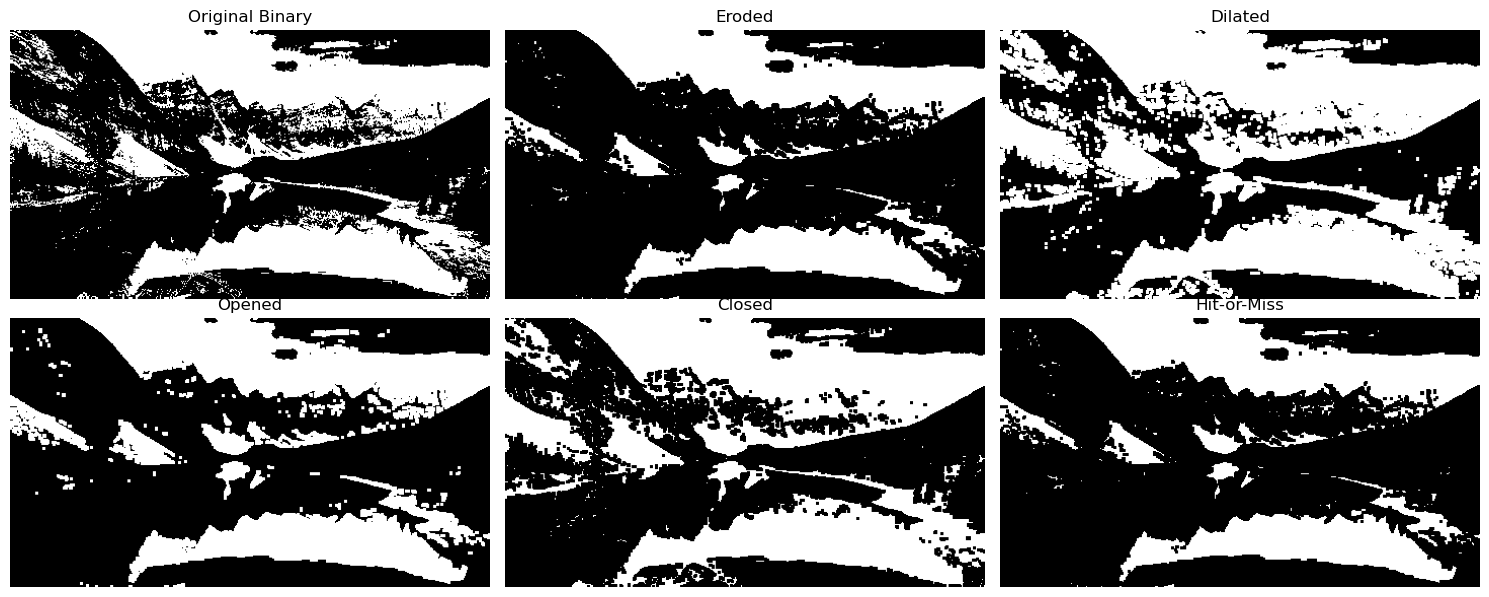

In [4]:
# === Imports ===
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === Load and Convert to Binary ===
img_path = r"C:\Users\onlyh\Downloads\nature1.jpeg"
img = cv2.imread(img_path, 0)
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# === Structuring Element ===
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# === Erosion ===
eroded = cv2.erode(binary, kernel, iterations=1)

# === Dilation ===
dilated = cv2.dilate(binary, kernel, iterations=1)

# === Opening ===
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# === Closing ===
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# === Hit-or-Miss ===
# Must be binary image with only 0 and 1
binary_0_1 = binary // 255
hitormiss = cv2.morphologyEx(binary_0_1.astype(np.uint8), cv2.MORPH_HITMISS, kernel)

# === Visualization ===
titles = ['Original Binary', 'Eroded', 'Dilated', 'Opened', 'Closed', 'Hit-or-Miss']
images = [binary, eroded, dilated, opened, closed, hitormiss * 255]

plt.figure(figsize=(15, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [5]:
pip install opencv-python scikit-image matplotlib


In [16]:
#region fill, convex hull, morphological gradient

C:\Users\onlyh\AppData\Local\Temp\ipykernel_65520\33237204.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  seed = plt.ginput(1)


No point clicked. Using default seed point (100, 100).


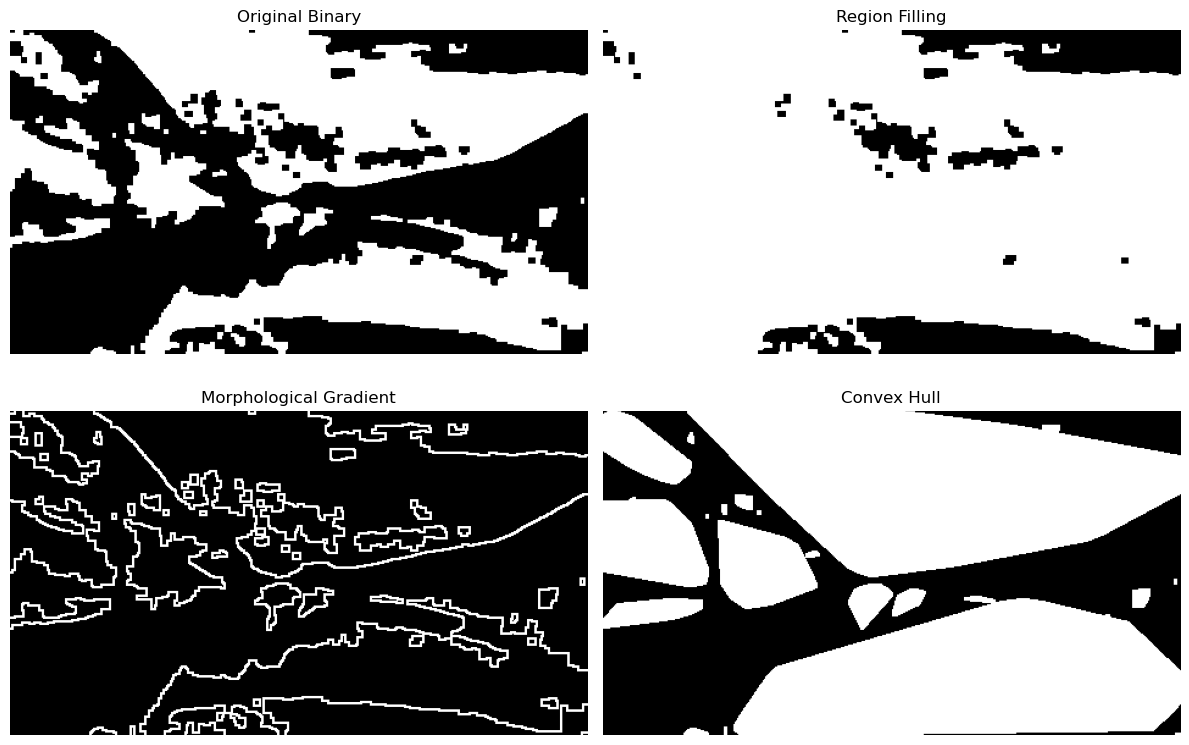

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import convex_hull_image

# ========= STEP 1: Load and Preprocess =========
img_path = r"C:\Users\onlyh\Downloads\nature1.jpeg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError(f"Image not found at path: {img_path}")

# Convert to binary
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Optional: Noise cleanup (close small holes, remove speckles)
binary_clean = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, np.ones((5, 5), np.uint8))
binary_clean = cv2.morphologyEx(binary_clean, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8))

# ==============================================
# STEP 2: Interactive Seed Selection (Safe Version)
# ==============================================
plt.figure(figsize=(6, 6))
plt.imshow(binary_clean, cmap='gray')
plt.title("Click inside a white region (then close window)")
seed = plt.ginput(1)
plt.close()

# If user doesn't click, use default safe seed point
if not seed:
    print("No point clicked. Using default seed point (100, 100).")
    seed_point = (100, 100)
else:
    x, y = map(int, seed[0])
    seed_point = (x, y)


# ==============================================
# STEP 3: Region Filling Algorithm
# ==============================================
def region_filling(binary_img, seed_point):
    h, w = binary_img.shape
    filled = np.zeros((h, w), np.uint8)
    x, y = seed_point
    filled[y, x] = 255

    mask = cv2.bitwise_not(binary_img)
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

    while True:
        dilated = cv2.dilate(filled, kernel)
        new_fill = cv2.bitwise_and(dilated, mask)
        if np.array_equal(new_fill, filled):
            break
        filled = new_fill.copy()

    return cv2.bitwise_or(filled, binary_img)

region_filled = region_filling(binary_clean, seed_point)

# ==============================================
# STEP 4: Morphological Gradient
# ==============================================
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilation = cv2.dilate(binary_clean, kernel)
erosion = cv2.erode(binary_clean, kernel)
morph_gradient = cv2.subtract(dilation, erosion)

# ==============================================
# STEP 5: Convex Hull (Contour-wise)
# ==============================================
def contour_wise_convex_hull(binary_img):
    contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    hull_image = np.zeros_like(binary_img)

    for contour in contours:
        hull = cv2.convexHull(contour)
        cv2.drawContours(hull_image, [hull], 0, 255, -1)

    return hull_image

convex_hull = contour_wise_convex_hull(binary_clean)

# ==============================================
# STEP 6: Display All Results
# ==============================================
titles = ['Original Binary', 'Region Filling', 'Morphological Gradient', 'Convex Hull']
images = [binary_clean, region_filled, morph_gradient, convex_hull]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [20]:
!pip install mahotas

     ---------------------------------------- 1.7/1.7 MB 244.8 kB/s eta 0:00:00


In [22]:
!pip install pymfe

     ------------------------------------ 156.0/156.0 kB 300.5 kB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 217.4 kB/s eta 0:00:00


In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops
from skimage.util.dtype import img_as_ubyte
import mahotas
from pymfe.mfe import MFE
import time
import tracemalloc

# ========================
# STEP 1: Read + Preprocess
# ========================
img_path = r"C:\Users\onlyh\Downloads\nature1.jpeg"
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError(f"Image not found at: {img_path}")

# Ensure image is 8-bit
image_ubyte = img_as_ubyte(image)

# ========================
# STEP 2: GLCM Features
# ========================
start_glcm = time.time()
tracemalloc.start()

glcm = greycomatrix(image_ubyte, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
contrast = greycoprops(glcm, 'contrast')[0, 0]
correlation = greycoprops(glcm, 'correlation')[0, 0]
energy = greycoprops(glcm, 'energy')[0, 0]
homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]

current_mem_glcm, peak_mem_glcm = tracemalloc.get_traced_memory()
tracemalloc.stop()
end_glcm = time.time()

# ========================
# STEP 3: LBP Features
# ========================
start_lbp = time.time()
tracemalloc.start()

radius = 1
n_points = 8 * radius
lbp = local_binary_pattern(image, n_points, radius, method='uniform')
hist_lbp, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
hist_lbp = hist_lbp.astype("float")
hist_lbp /= hist_lbp.sum()

current_mem_lbp, peak_mem_lbp = tracemalloc.get_traced_memory()
tracemalloc.stop()
end_lbp = time.time()

# ========================
# STEP 4: GLRLM Features
# ========================
start_glrlm = time.time()
tracemalloc.start()

glrlm_features = mahotas.features.haralick(image).mean(axis=0)

current_mem_glrlm, peak_mem_glrlm = tracemalloc.get_traced_memory()
tracemalloc.stop()
end_glrlm = time.time()



# ========================
# STEP 6: Output Results
# ========================
print("GLCM Features:")
print(f"  Contrast:     {contrast:.4f}")
print(f"  Correlation:  {correlation:.4f}")
print(f"  Energy:       {energy:.4f}")
print(f"  Homogeneity:  {homogeneity:.4f}")
print(f"  Time:         {end_glcm - start_glcm:.4f} s")
print(f"  Peak Memory:  {peak_mem_glcm / 1024:.2f} KB\n")

print("LBP Histogram (first 10 bins):", hist_lbp[:10])
print(f"  Time:         {end_lbp - start_lbp:.4f} s")
print(f"  Peak Memory:  {peak_mem_lbp / 1024:.2f} KB\n")

print("GLRLM Features (first 10):", glrlm_features[:10])
print(f"  Time:         {end_glrlm - start_glrlm:.4f} s")
print(f"  Peak Memory:  {peak_mem_glrlm / 1024:.2f} KB\n")




C:\Users\onlyh\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\onlyh\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\onlyh\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\onlyh\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\onlyh\anaconda3\lib\site-

GLCM Features:
  Contrast:     451.7613
  Correlation:  0.9159
  Energy:       0.0222
  Homogeneity:  0.2892
  Time:         0.0804 s
  Peak Memory:  12802.60 KB

LBP Histogram (first 10 bins): [0.05900828 0.07343517 0.04991117 0.09304115 0.13676597 0.19414041
 0.07464865 0.07911392 0.11681895 0.12311634]
  Time:         0.0626 s
  Peak Memory:  1975.75 KB

GLRLM Features (first 10): [2.91017913e-04 6.16263025e+02 8.85456987e-01 2.68979681e+03
 2.14146477e-01 2.15772379e+02 1.01429242e+04 8.61267834e+00
 1.34018414e+01 2.04699602e-04]
  Time:         0.0403 s
  Peak Memory:  3604.91 KB

